[View in Colaboratory](https://colab.research.google.com/github/heumchri/ESPNet/blob/master/testPretrainedESPNet.ipynb)

In [1]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))


In [2]:
printm()

Gen RAM Free: 12.6 GB  I Proc size: 136.8 MB
GPU RAM Free: 11438MB | Used: 1MB | Util   0% | Total 11439MB


In [3]:
ls

cityscapesScripts/  datalab/  datasets/


In [4]:
#!kill -9 -1

# Install ESPNet

In [5]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 

    100% |████████████████████████████████| 592.3MB 49.0MB/s 


In [6]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [7]:
cd /content/

/content


In [8]:
!git clone https://github.com/heumchri/ESPNet.git

Cloning into 'ESPNet'...
remote: Counting objects: 321, done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 321 (delta 21), reused 0 (delta 0), pack-reused 277
Receiving objects: 100% (321/321), 15.69 MiB | 30.20 MiB/s, done.
Resolving deltas: 100% (153/153), done.


In [19]:
cd /content/ESPNet/

/content/ESPNet


In [20]:
!git pull

remote: Counting objects: 10, done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.
From https://github.com/heumchri/ESPNet
   d5cb94d..5869b81  master     -> origin/master
Updating d5cb94d..5869b81
Fast-forward
 train/city/train_small.txt | 20 ++++++++++++++++++++
 train/city/val_small.txt   | 20 ++++++++++++++++++++
 2 files changed, 40 insertions(+)
 create mode 100644 train/city/train_small.txt
 create mode 100644 train/city/val_small.txt


# test pretrained model (all classes, val dataset)

In [11]:
cd /content/ESPNet/test/

/content/ESPNet/test


In [106]:
!python3 VisualizeResults.py --modelType 1 --data_dir /content/datasets/cityscapes/leftImg8bit/val/frankfurt/
!python3 VisualizeResults.py --modelType 1 --data_dir /content/datasets/cityscapes/leftImg8bit/val/lindau/
!python3 VisualizeResults.py --modelType 1 --data_dir /content/datasets/cityscapes/leftImg8bit/val/munster/

0
100
200
0
0
100


## visualize results

In [107]:
#ls results/

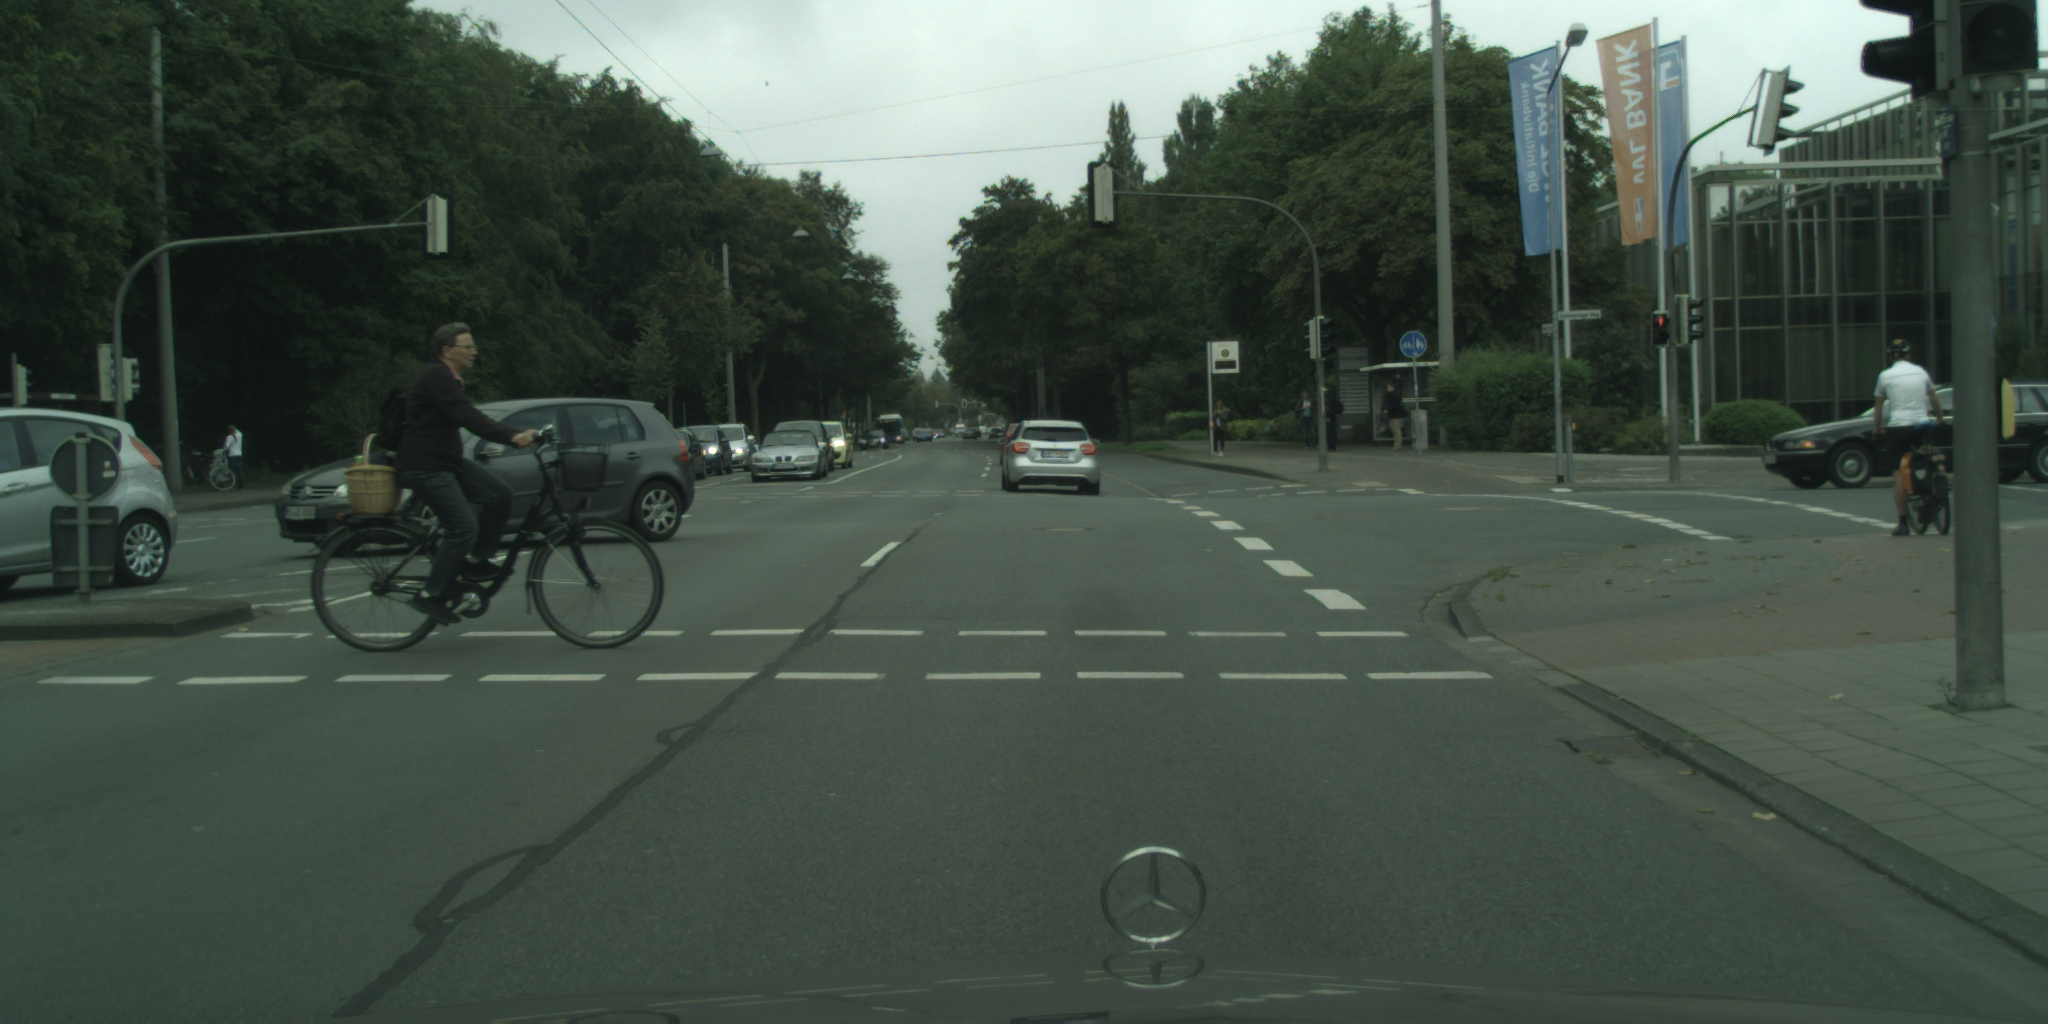

In [108]:
from IPython.display import Image
Image('/content/datasets/cityscapes/leftImg8bit/val/munster/munster_000000_000019_leftImg8bit.png')


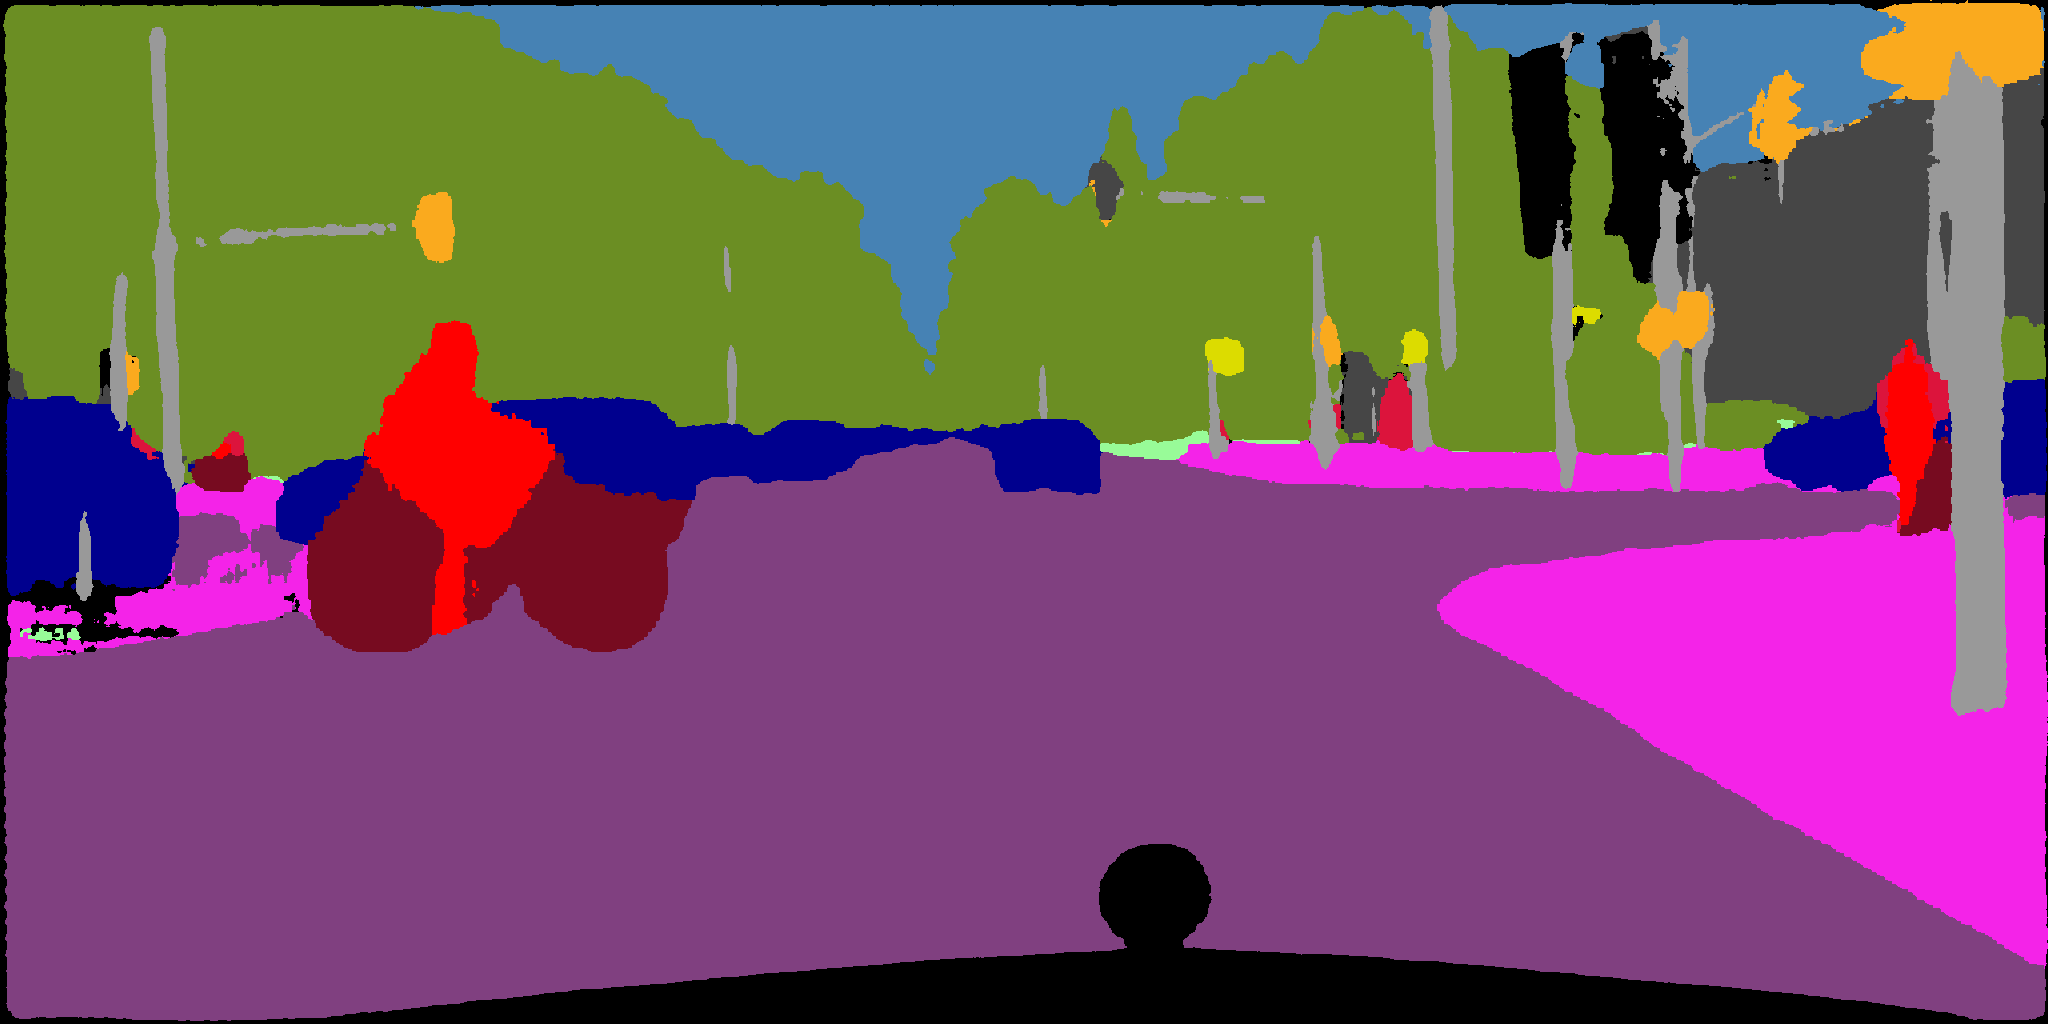

In [109]:
Image('results/c_munster_000000_000019_leftImg8bit.png')

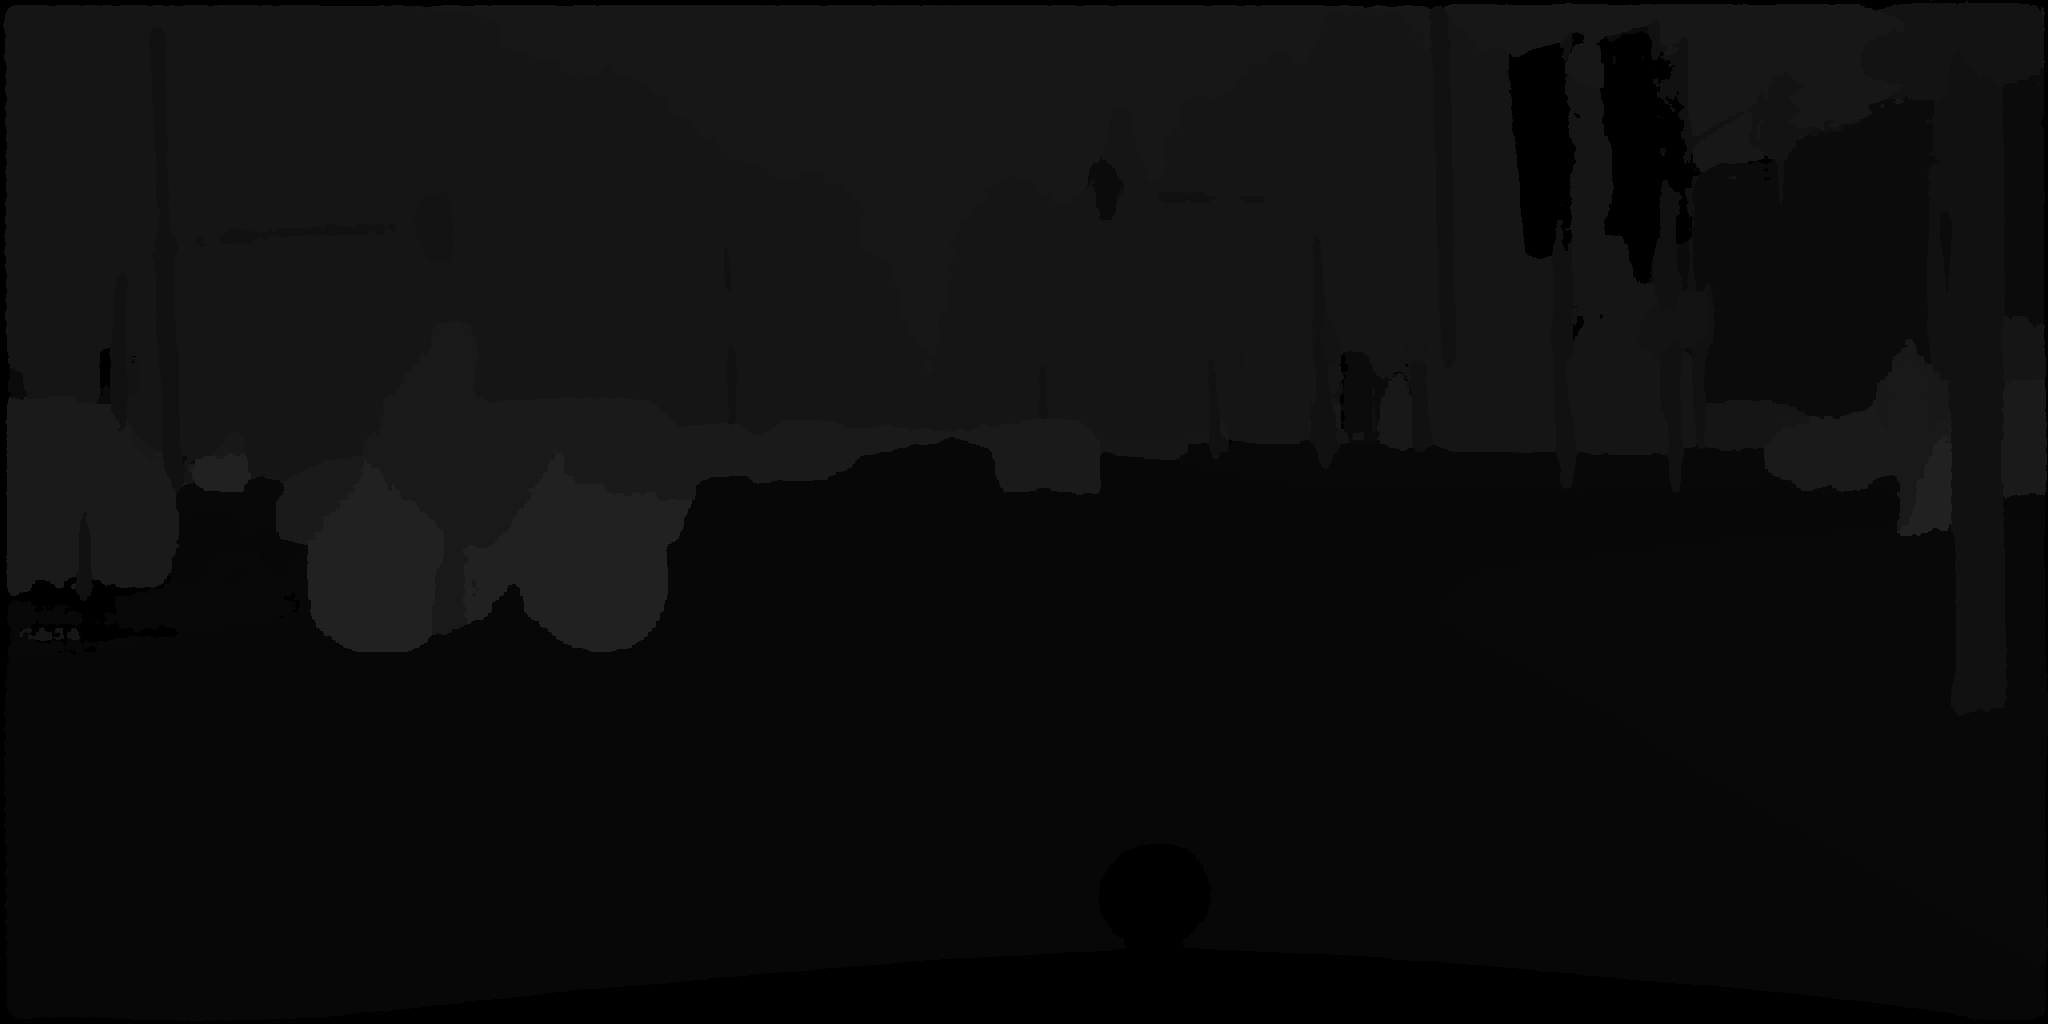

In [110]:
Image('results/munster_000000_000019_leftImg8bit.png')

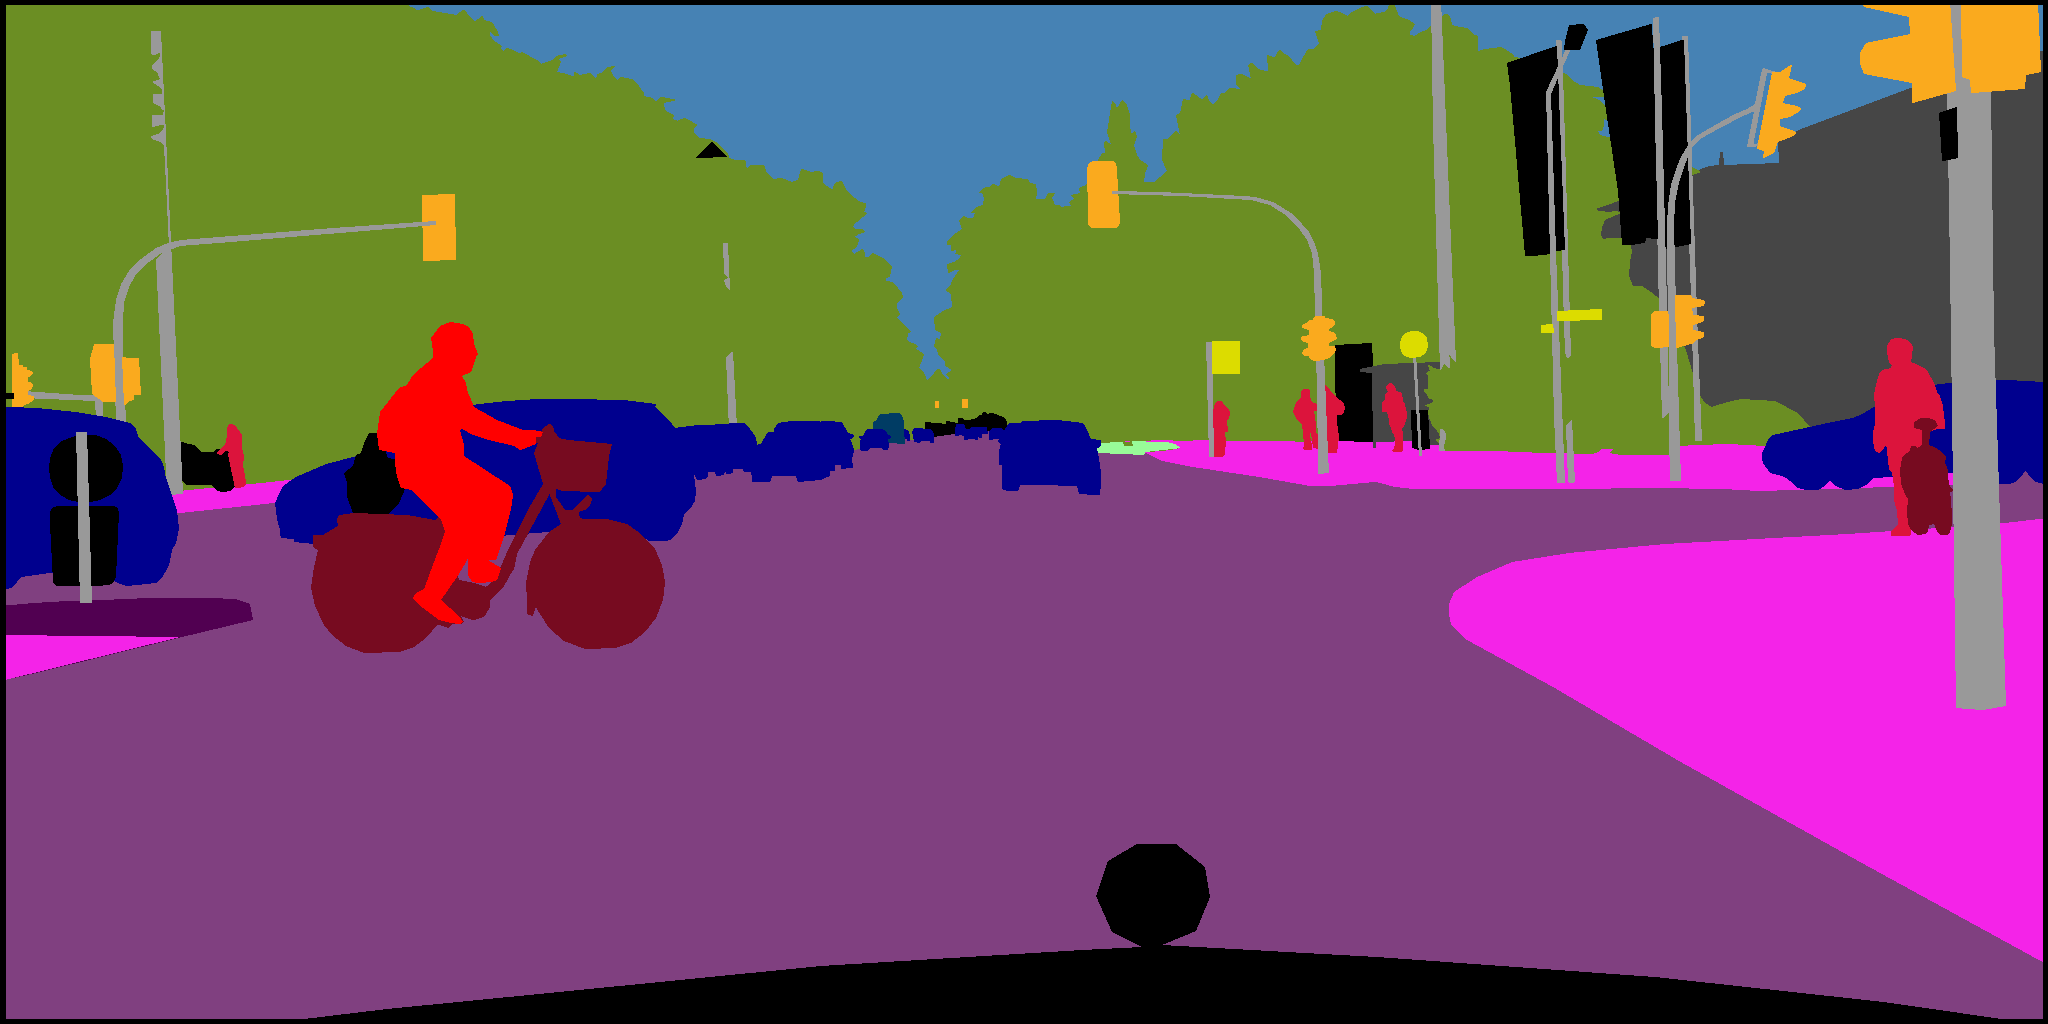

In [111]:
Image('/content/datasets/cityscapes/gtFine/val/munster/munster_000000_000019_gtFine_color.png')

## evaluate results

In [112]:
import os
os.environ['CITYSCAPES_RESULTS'] = '/content/ESPNet/test/results/'
os.environ['CITYSCAPES_DATASET'] = '/content/datasets/cityscapes/'

In [113]:
cd /content/cityscapesScripts/cityscapesscripts/evaluation/

/content/cityscapesScripts/cityscapesscripts/evaluation


In [114]:
!python2 evalPixelLevelSemanticLabeling.py 

Evaluating 500 pairs of images...
Images Processed: 500 

--------------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------- 
              |   u   |   e   |   r   |   o   |   s   |   d   |   g   |   r   |   s   |   p   |   r   |   b   |   w   |   f   |   g   |   b   |   t   |   p   |   p   |   t   |   t   |   v   |   t   |   s   |   p   |   r   |   c   |   t   |   b   |   c   |   t   |   t   |   m   |   b   |  Prior |
--------------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------

# test pretrained model (all classes, val dataset, only encoder)

In [116]:
cd /content/ESPNet/test/

/content/ESPNet/test


In [117]:
!python3 VisualizeResults.py --modelType 2 --data_dir /content/datasets/cityscapes/leftImg8bit/val/frankfurt/
!python3 VisualizeResults.py --modelType 2 --data_dir /content/datasets/cityscapes/leftImg8bit/val/lindau/
!python3 VisualizeResults.py --modelType 2 --data_dir /content/datasets/cityscapes/leftImg8bit/val/munster/

0
100
200
0
0
100


## visualize results

In [118]:
#ls results/

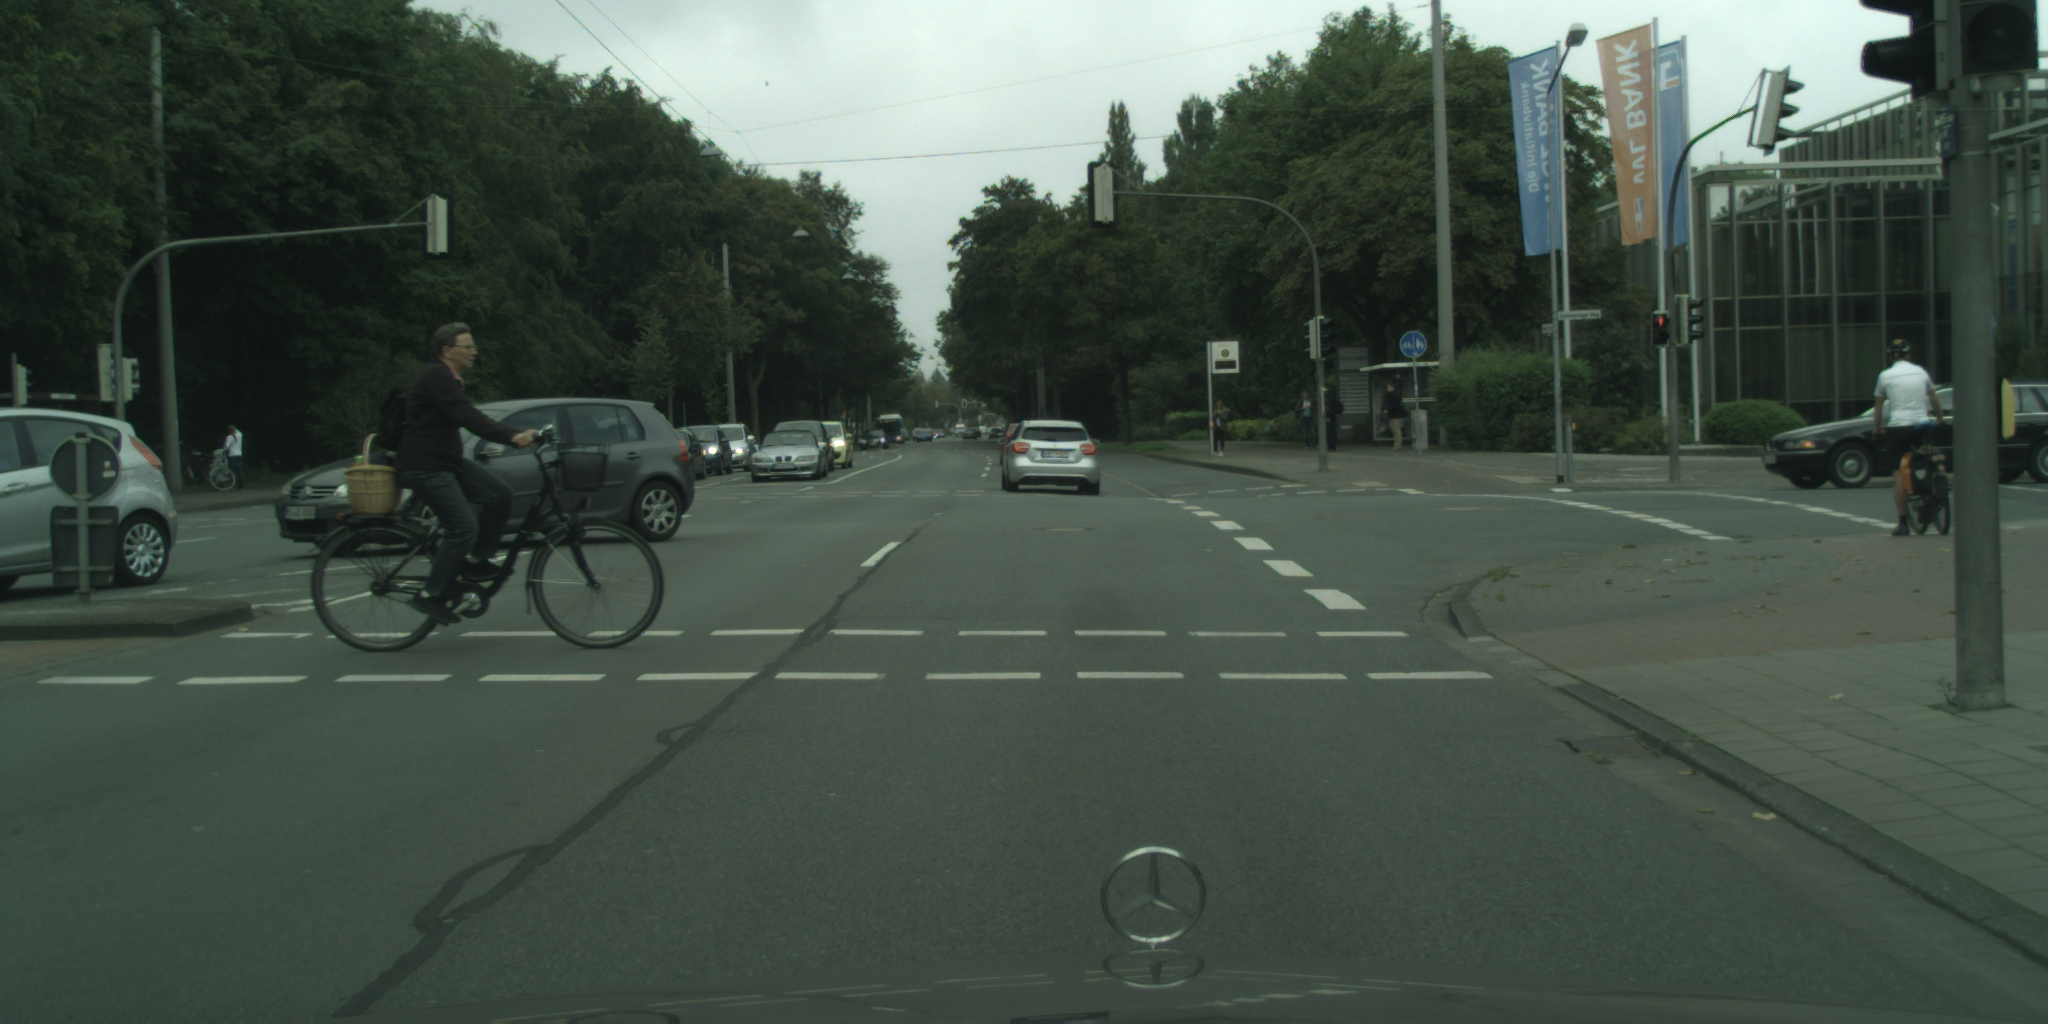

In [119]:
from IPython.display import Image
Image('/content/datasets/cityscapes/leftImg8bit/val/munster/munster_000000_000019_leftImg8bit.png')


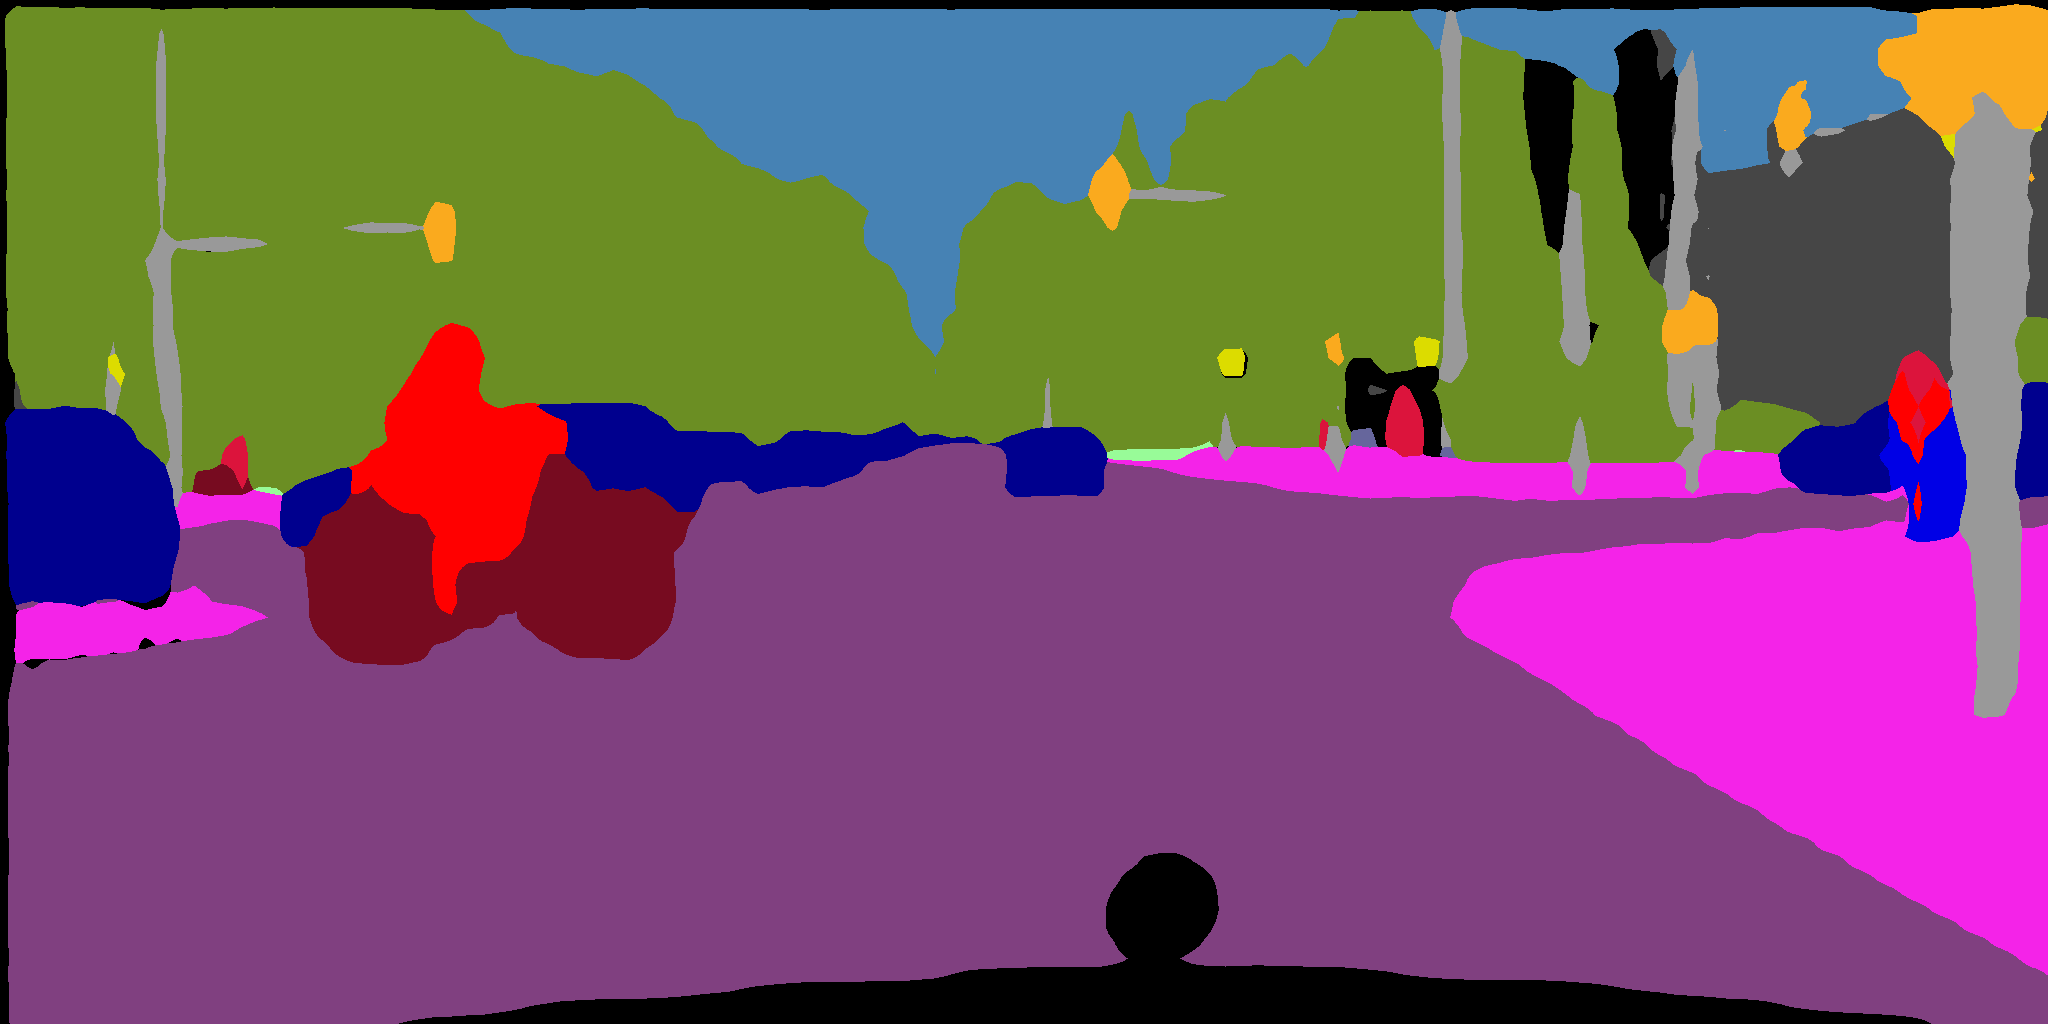

In [120]:
Image('results/c_munster_000000_000019_leftImg8bit.png')

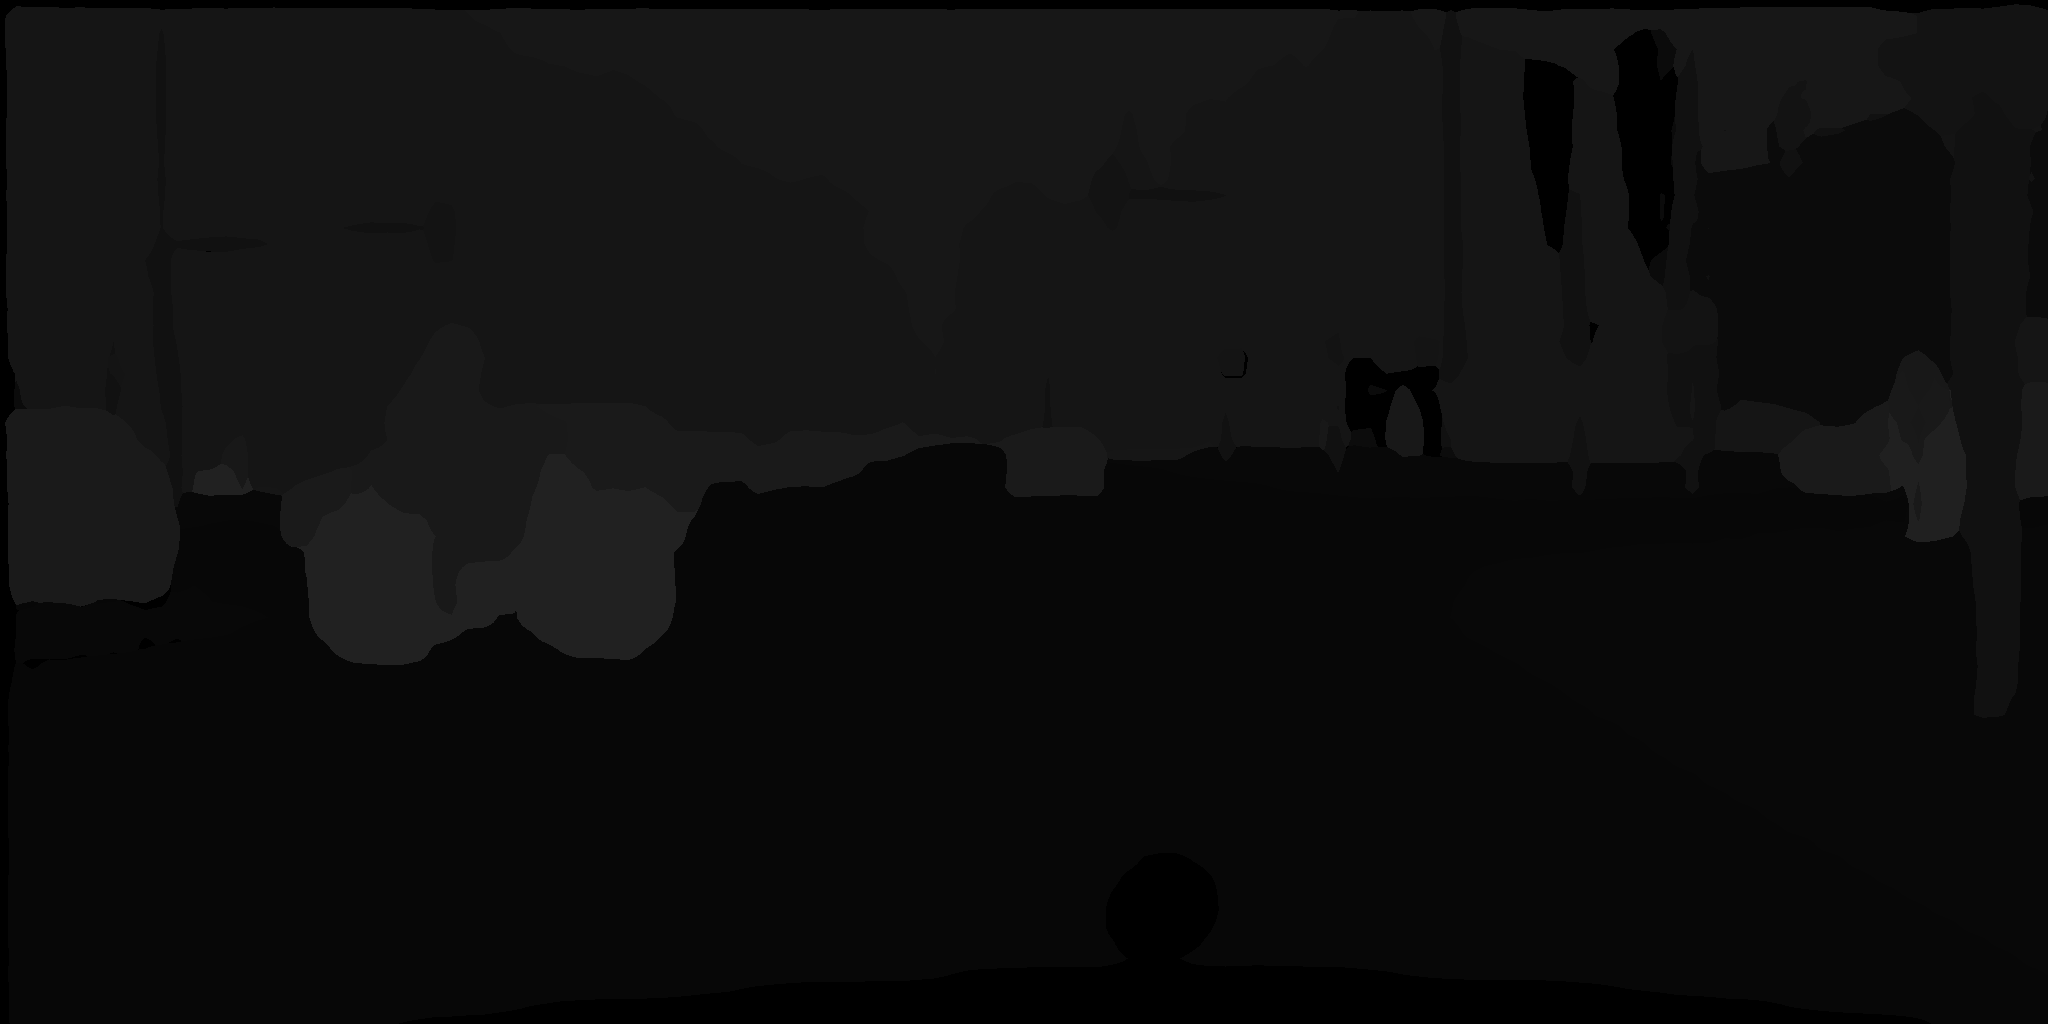

In [121]:
Image('results/munster_000000_000019_leftImg8bit.png')

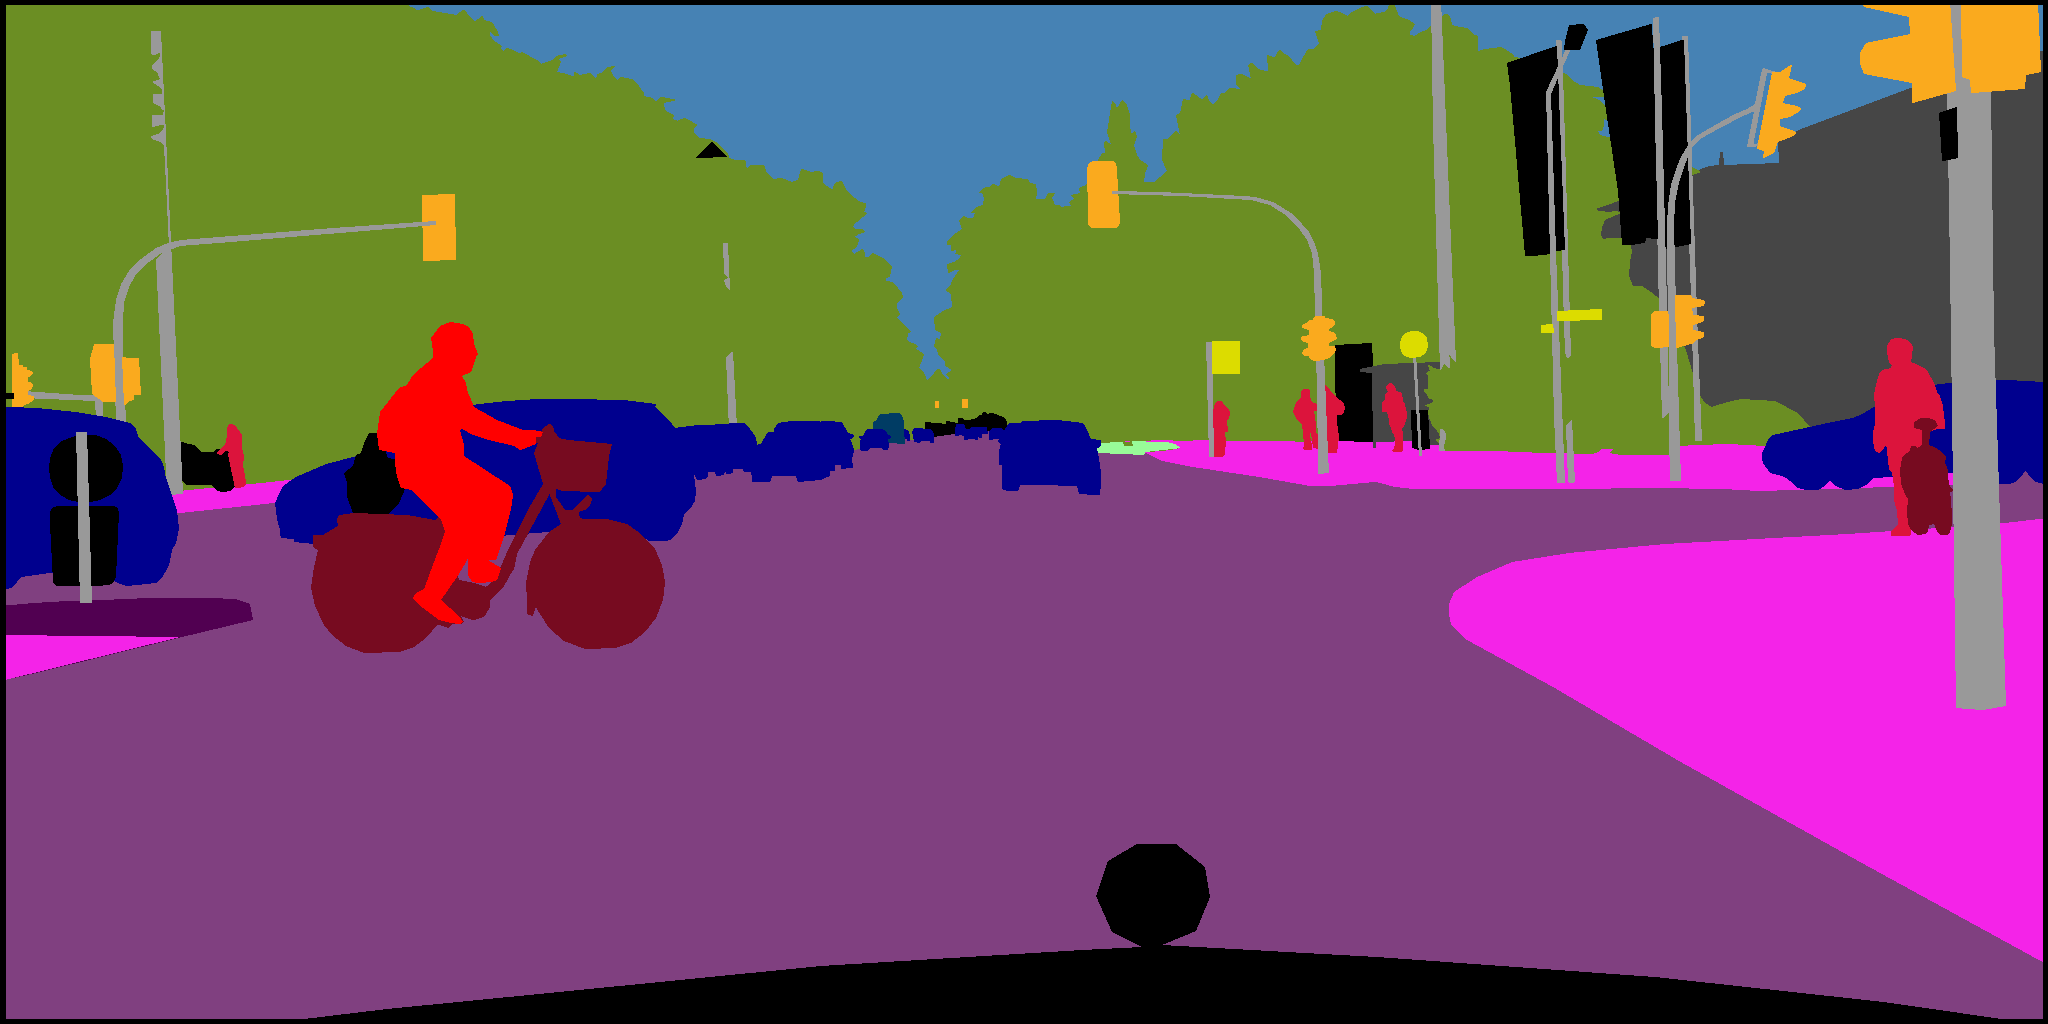

In [122]:
Image('/content/datasets/cityscapes/gtFine/val/munster/munster_000000_000019_gtFine_color.png')

## evaluate results

In [123]:
import os
os.environ['CITYSCAPES_RESULTS'] = '/content/ESPNet/test/results/'
os.environ['CITYSCAPES_DATASET'] = '/content/datasets/cityscapes/'

In [124]:
cd /content/cityscapesScripts/cityscapesscripts/evaluation/

/content/cityscapesScripts/cityscapesscripts/evaluation


In [125]:
!python2 evalPixelLevelSemanticLabeling.py 

Evaluating 500 pairs of images...
Images Processed: 500 

--------------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------- 
              |   u   |   e   |   r   |   o   |   s   |   d   |   g   |   r   |   s   |   p   |   r   |   b   |   w   |   f   |   g   |   b   |   t   |   p   |   p   |   t   |   t   |   v   |   t   |   s   |   p   |   r   |   c   |   t   |   b   |   c   |   t   |   t   |   m   |   b   |  Prior |
--------------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------

# test pretrained model (binary, val dataset)

In [0]:
cd /content/ESPNet/test/

/content/ESPNet/test


In [0]:
!python3 VisualizeResults_pretrained_binary.py --modelType 1 --data_dir /content/datasets/cityscapes/leftImg8bit/val/frankfurt/
!python3 VisualizeResults_pretrained_binary.py --modelType 1 --data_dir /content/datasets/cityscapes/leftImg8bit/val/lindau/
!python3 VisualizeResults_pretrained_binary.py --modelType 1 --data_dir /content/datasets/cityscapes/leftImg8bit/val/munster/

0
100
200


## visualize results

In [0]:
#ls results/

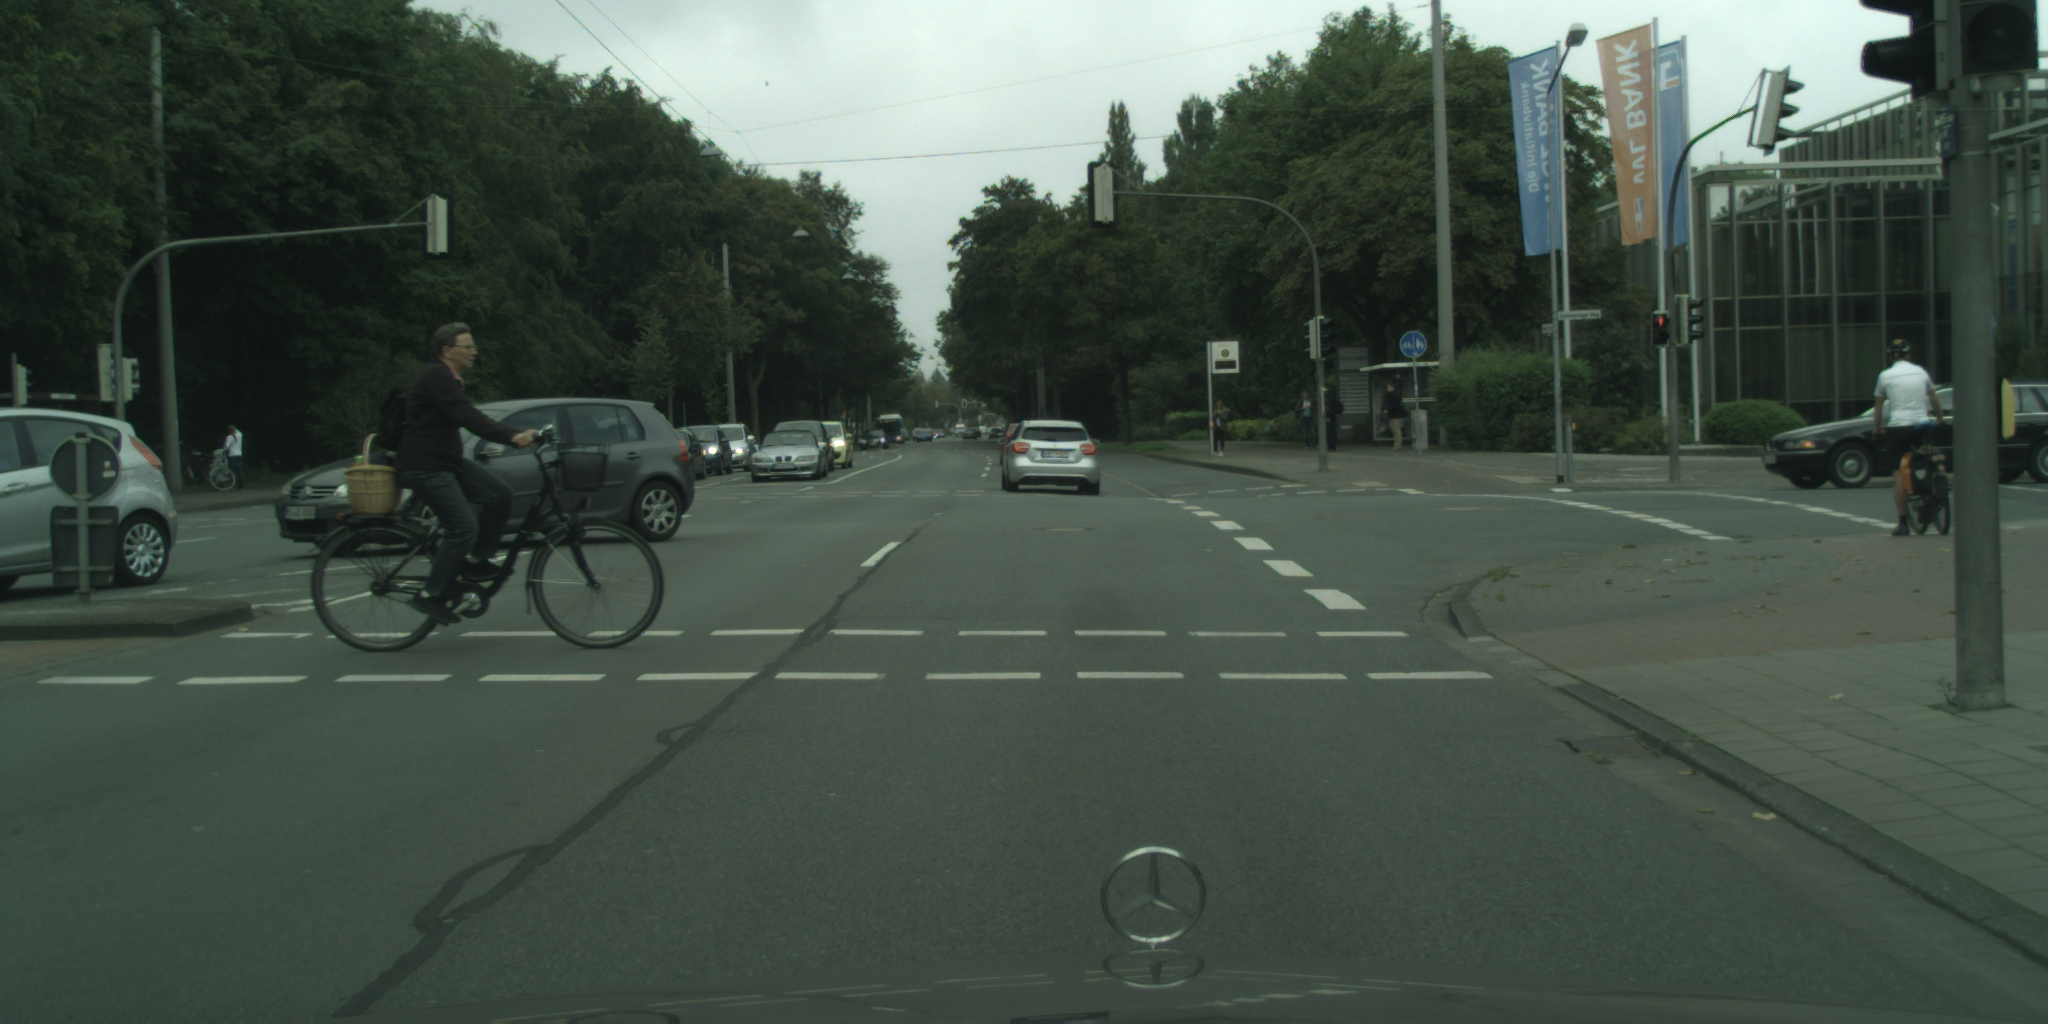

In [0]:
from IPython.display import Image
Image('/content/datasets/cityscapes/leftImg8bit/val/munster/munster_000000_000019_leftImg8bit.png')


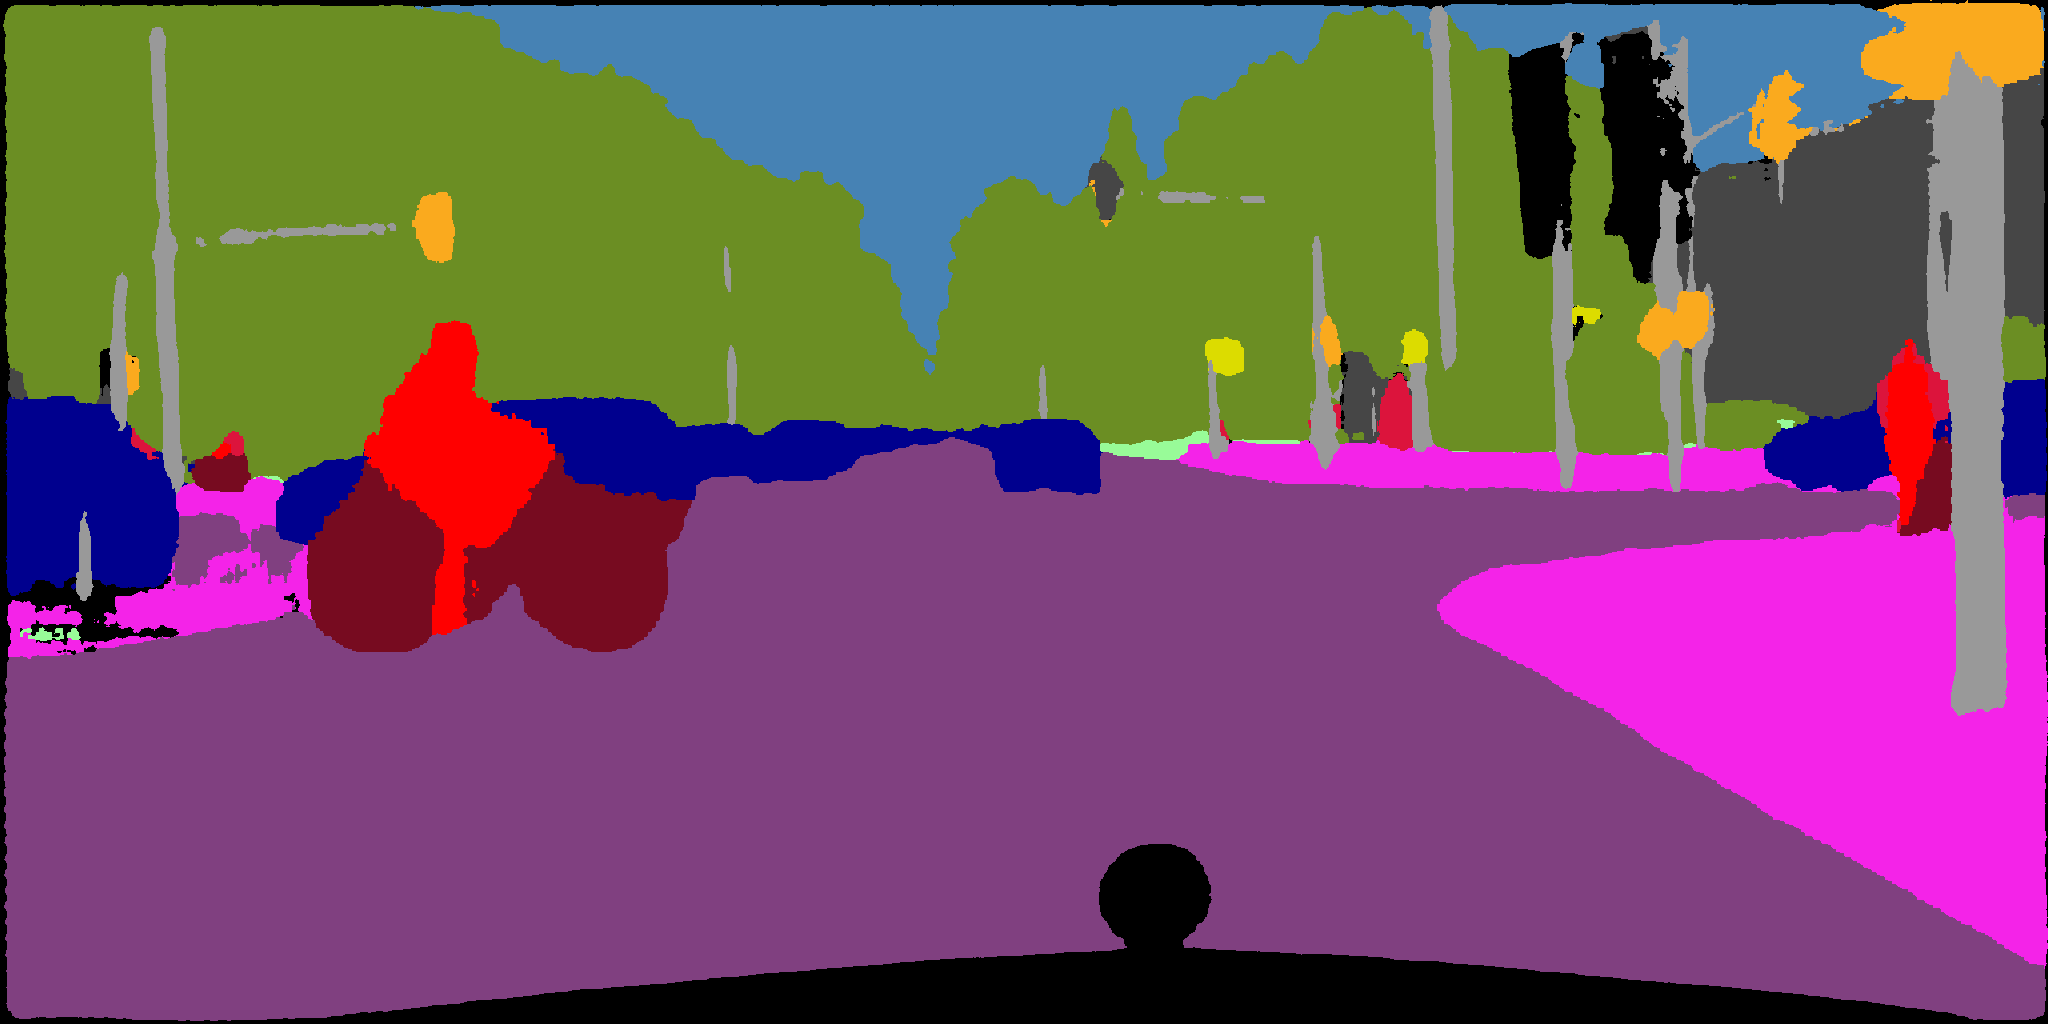

In [0]:
Image('results/c_munster_000000_000019_leftImg8bit.png')

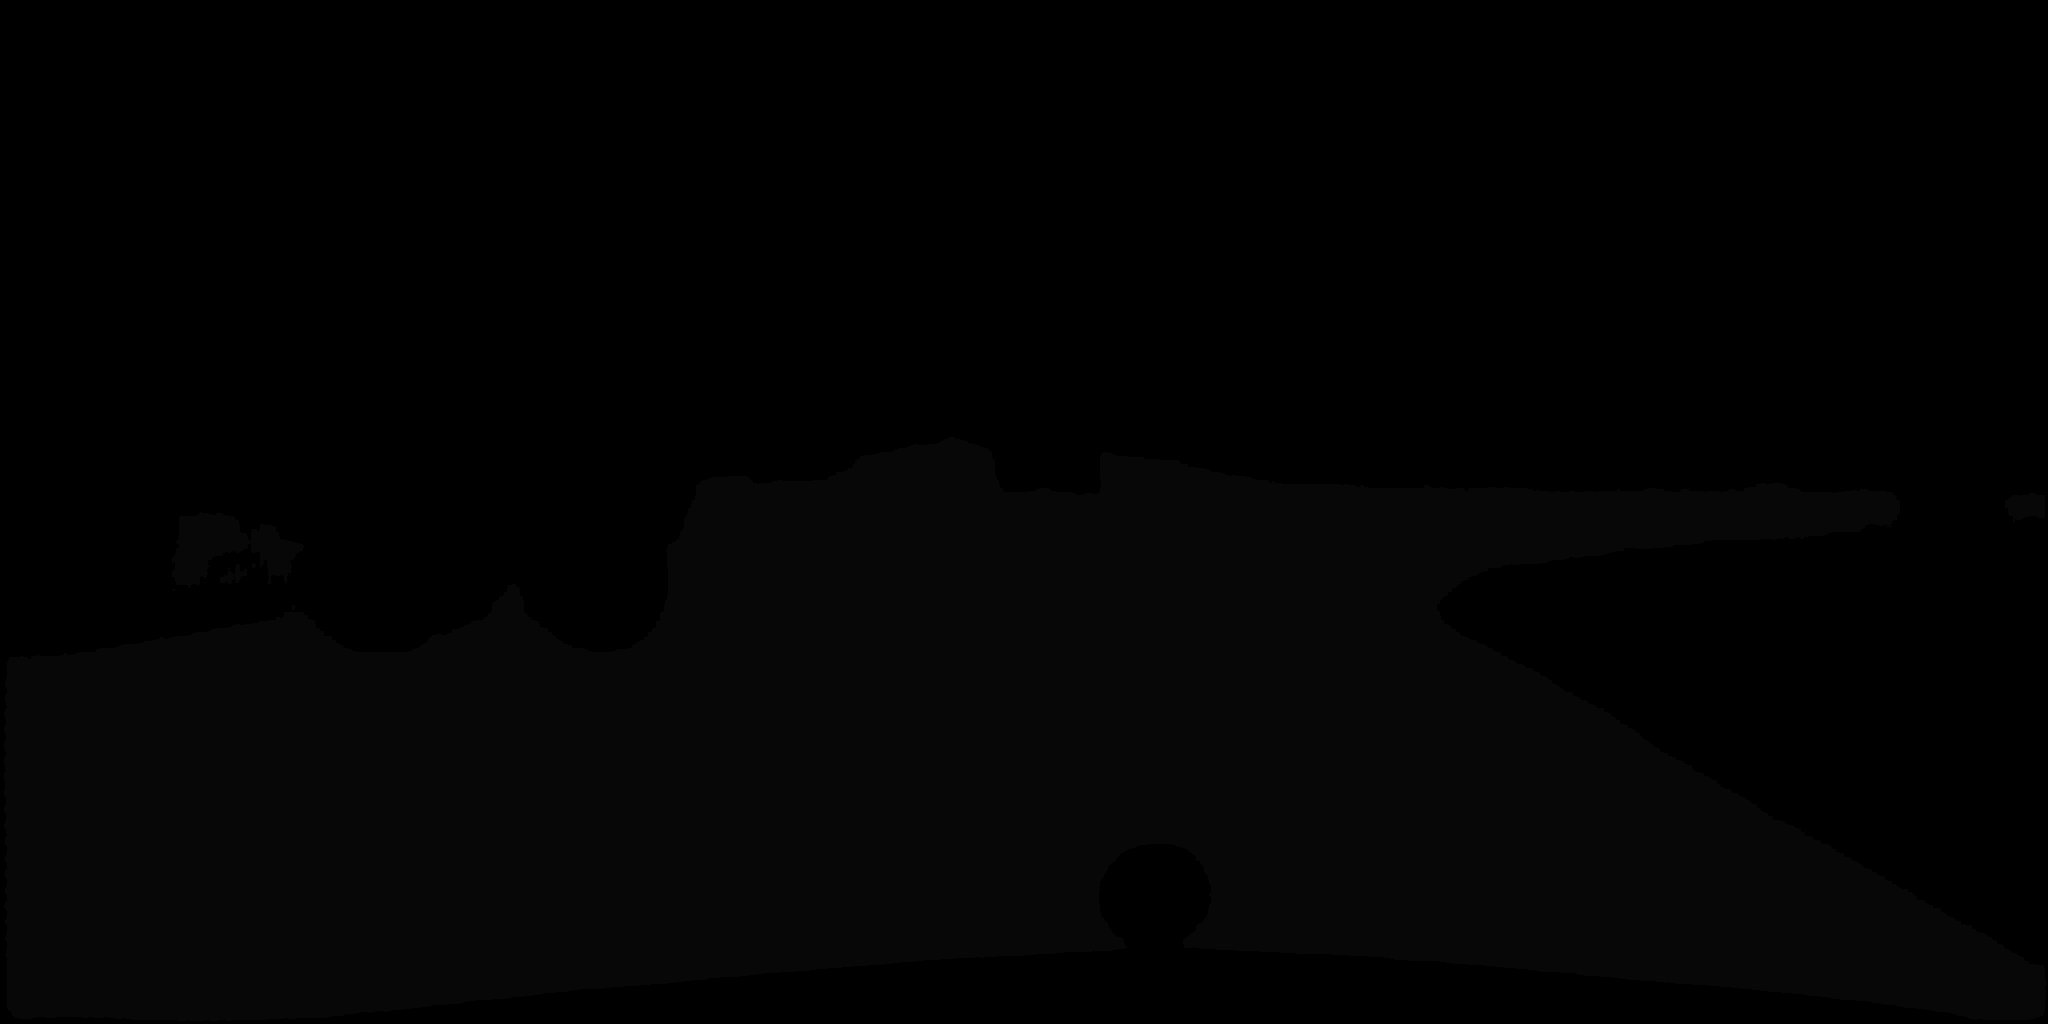

In [0]:
Image('results/munster_000000_000019_leftImg8bit.png')

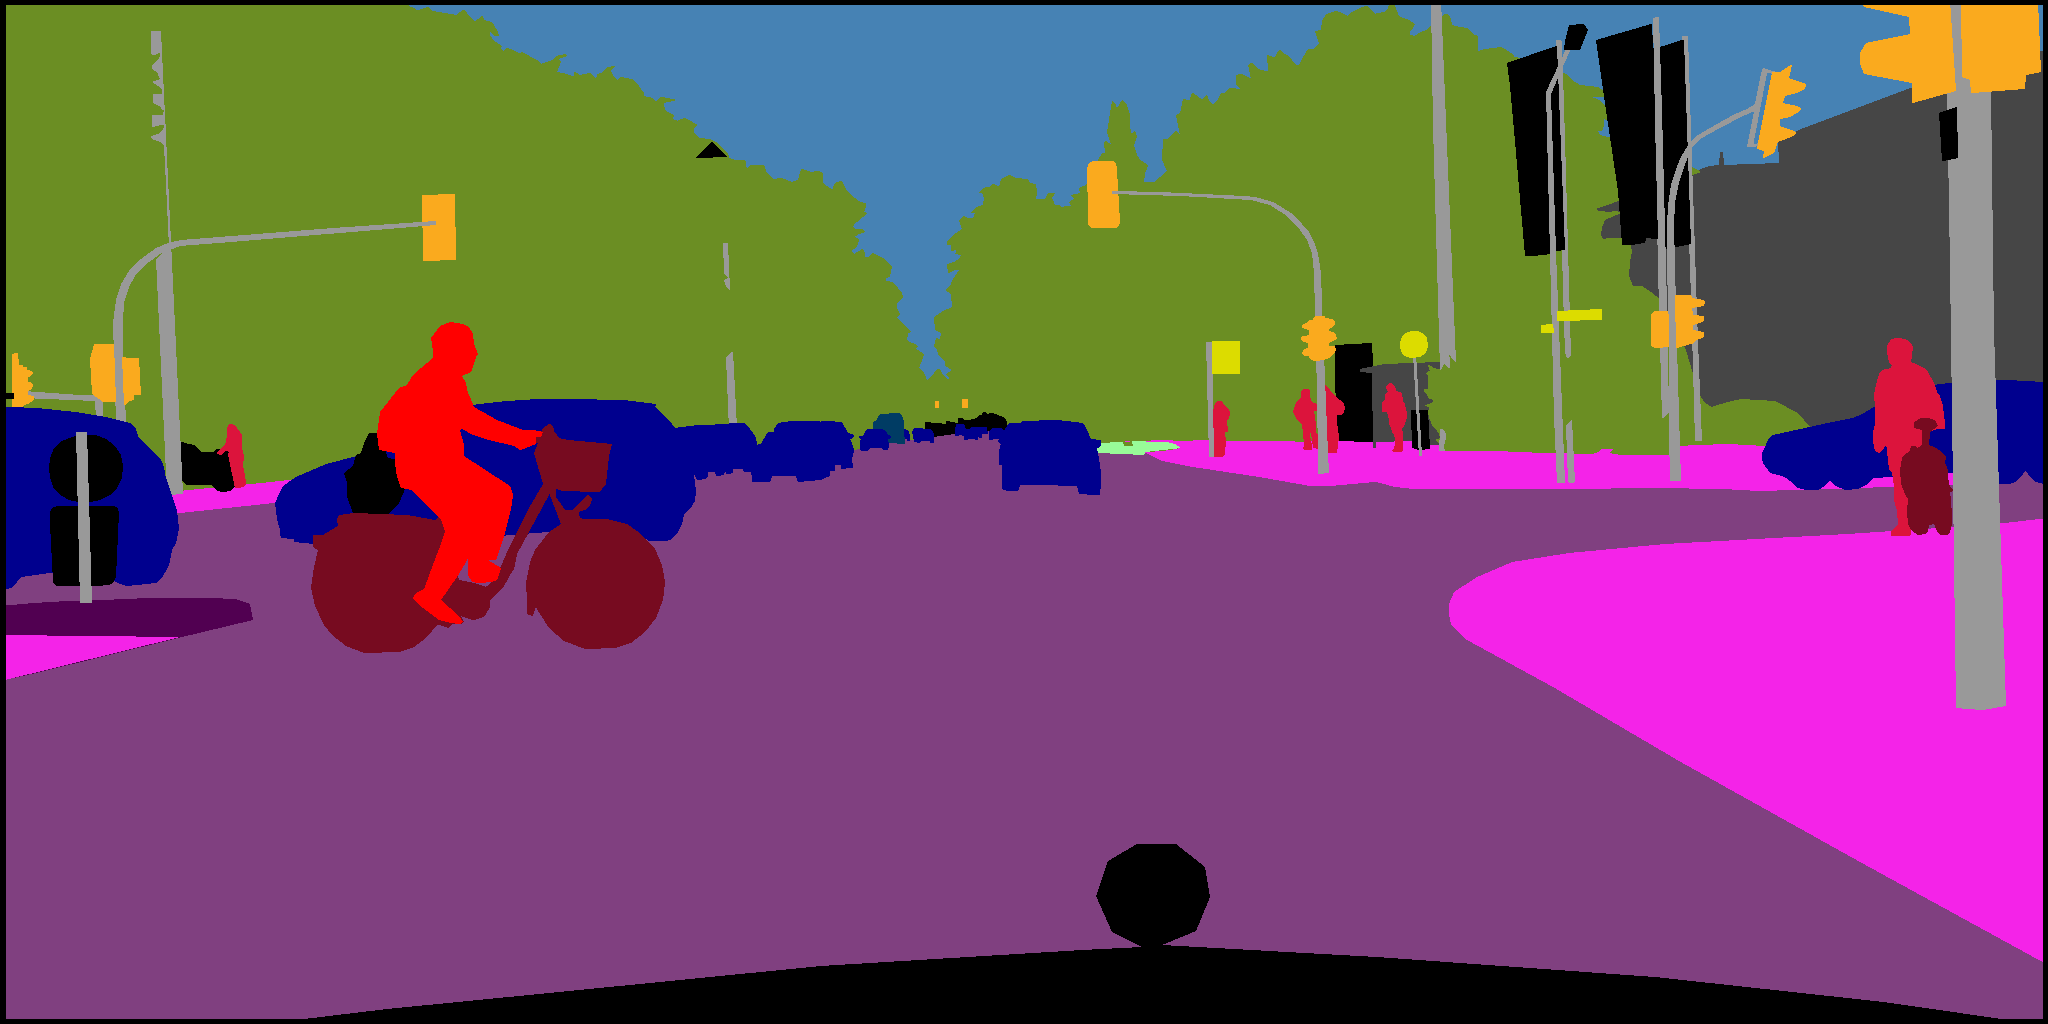

In [0]:
Image('/content/datasets/cityscapes/gtFine/val/munster/munster_000000_000019_gtFine_color.png')

## evaluate results

In [0]:
import os
os.environ['CITYSCAPES_RESULTS'] = '/content/ESPNet/test/results/'
os.environ['CITYSCAPES_DATASET'] = '/content/datasets/cityscapes/'

In [0]:
cd /content/cityscapesScripts/cityscapesscripts/evaluation/

/content/cityscapesScripts/cityscapesscripts/evaluation


In [0]:
!python2 evalPixelLevelSemanticLabeling.py 

Evaluating 500 pairs of images...
Images Processed: 500 

--------------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------- 
              |   u   |   e   |   r   |   o   |   s   |   d   |   g   |   r   |   s   |   p   |   r   |   b   |   w   |   f   |   g   |   b   |   t   |   p   |   p   |   t   |   t   |   v   |   t   |   s   |   p   |   r   |   c   |   t   |   b   |   c   |   t   |   t   |   m   |   b   |  Prior |
--------------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------  ------

# retrain model (binary)

##retrain encoder

In [12]:
!pip install graphviz

In [22]:
cp /content/ESPNet/train/city/* /content/datasets/cityscapes/

In [23]:
#cd /content/datasets/cityscapes/

/content/datasets/cityscapes


In [25]:
#rm -r train.txt val.txt

In [27]:
#mv train_small.txt train.txt

In [29]:
#mv val_small.txt val.txt

In [30]:
cd /content/ESPNet/train/

/content/ESPNet/train


In [36]:
!python3 main.py --scaleIn 8 --data_dir /content/datasets/cityscapes/ --classes 2 --batch_size 1

Total network parameters: 344841
Data statistics
[74.91741  84.115005 71.9477  ] [48.784817 49.940002 48.505238]
[2.7042232 1.7822728]
Learning rate: 0.0005
[0/20] loss: 0.776 time:3.04
[1/20] loss: 0.655 time:0.21
[2/20] loss: 0.573 time:0.21
[3/20] loss: 0.646 time:0.21
^C
Process Process-4:
Process Process-2:
Traceback (most recent call last):
Process Process-3:
  File "main.py", line 409, in <module>
    trainValidateSegmentation(parser.parse_args())
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 36, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/usr/lib/python3.6/multiprocessing/synchronize.py", line 96,